<a href="https://colab.research.google.com/github/ShivM99/Python/blob/main/Taxi_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

**Importing the dataset**

In [ ]:
data = pd.read_csv ('nyc_taxi_trip_duration.csv')
data.shape

(729322, 11)

**Handling the date-time data**

In [ ]:
data['pickup_datetime'] = pd.to_datetime (data['pickup_datetime'], format = '%d-%m-%Y %H:%M')
data['dropoff_datetime'] = pd.to_datetime (data['dropoff_datetime'], format = '%d-%m-%Y %H:%M')

data['check_trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).map (lambda x: x.total_seconds())

duration_difference = data[np.abs (data['check_trip_duration'].values  - data['trip_duration'].values) > 1]
duration_difference.shape

(693032, 12)

**Extracting important features from the 'pickup_datetime'**

In [ ]:
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_day']

0         29
1         11
2         21
3          5
4         17
          ..
729317    21
729318    22
729319    15
729320    19
729321     1
Name: pickup_day, Length: 729322, dtype: int64

In [ ]:
data['pickup_month'] = data['pickup_datetime'].dt.month
data['pickup_month']

0         2
1         3
2         2
3         1
4         2
         ..
729317    5
729318    2
729319    4
729320    6
729321    1
Name: pickup_month, Length: 729322, dtype: int64

In [ ]:
data['pickup_dayofweek'] = data['pickup_datetime'].dt.dayofweek
data['pickup_dayofweek']

0         0
1         4
2         6
3         1
4         2
         ..
729317    5
729318    0
729319    4
729320    6
729321    4
Name: pickup_dayofweek, Length: 729322, dtype: int64

In [ ]:
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_hour']

0         16
1         23
2         17
3          9
4          6
          ..
729317    13
729318     0
729319    18
729320     9
729321    17
Name: pickup_hour, Length: 729322, dtype: int64

In [ ]:
data['pickup_minute'] = data['pickup_datetime'].dt.minute
data['pickup_minute']

0         40
1         35
2         59
3         44
4         42
          ..
729317    29
729318    43
729319    56
729320    50
729321    24
Name: pickup_minute, Length: 729322, dtype: int64

**Log transforming the 'trip_duration' as it is positively skewed and we want it to be normally distributed**

In [ ]:
data['log_trip_duration'] = np.log (data['trip_duration'].values + 1)

In [ ]:
data.dtypes

id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag             object
trip_duration                   int64
check_trip_duration           float64
pickup_day                      int64
pickup_month                    int64
pickup_dayofweek                int64
pickup_hour                     int64
pickup_minute                   int64
log_trip_duration             float64
dtype: object

**Seggregating the features (x) from the target variable (y)**

In [ ]:
x = data.iloc[:, [1, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16]].values
x_df = pd.DataFrame (x, columns = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'pickup_day', 'pickup_month', 'pickup_dayofweek', 'pickup_hour', 'pickup_minute'])
x_df

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_dayofweek,pickup_hour,pickup_minute
0,2,1,-73.953918,40.778873,-73.963875,40.771164,N,29,2,0,16,40
1,1,2,-73.988312,40.731743,-73.994751,40.694931,N,11,3,4,23,35
2,2,2,-73.997314,40.721458,-73.948029,40.774918,N,21,2,6,17,59
3,2,6,-73.96167,40.75972,-73.956779,40.780628,N,5,1,1,9,44
4,1,1,-74.01712,40.708469,-73.988182,40.740631,N,17,2,2,6,42
...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,2,-73.965919,40.78978,-73.952637,40.789181,N,21,5,5,13,29
729318,1,1,-73.996666,40.737434,-74.00132,40.731911,N,22,2,0,0,43
729319,1,1,-73.997849,40.761696,-74.001488,40.741207,N,15,4,4,18,56
729320,1,1,-74.006706,40.708244,-74.01355,40.713814,N,19,6,6,9,50


In [ ]:
y = data.iloc[:, 17].values
y_df = pd.DataFrame (y, columns = ['log_trip_duration'])
y_df

,log_trip_duration
0,5.993961
1,7.003974
2,7.400010
3,7.040536
4,6.744059
...,...
729317,5.693732
729318,5.755742
729319,6.513230
729320,6.104793


**Checking for missing values in the dataset**

In [ ]:
data.isnull().sum()

id                     0
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
check_trip_duration    0
pickup_day             0
pickup_month           0
pickup_dayofweek       0
pickup_hour            0
pickup_minute          0
log_trip_duration      0
dtype: int64

**One hot encoding the categorical features**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer (transformers = [('ohe', OneHotEncoder (), [0, 6])], remainder = 'passthrough')
x = ct.fit_transform (x)
x

array([[0.0, 1.0, 1.0, ..., 0, 16, 40],
       [1.0, 0.0, 1.0, ..., 4, 23, 35],
       [0.0, 1.0, 1.0, ..., 6, 17, 59],
       ...,
       [1.0, 0.0, 1.0, ..., 4, 18, 56],
       [1.0, 0.0, 1.0, ..., 6, 9, 50],
       [0.0, 1.0, 1.0, ..., 4, 17, 24]], dtype=object)

In [ ]:
x_df.dtypes

vendor_id             object
passenger_count       object
pickup_longitude      object
pickup_latitude       object
dropoff_longitude     object
dropoff_latitude      object
store_and_fwd_flag    object
pickup_day            object
pickup_month          object
pickup_dayofweek      object
pickup_hour           object
pickup_minute         object
dtype: object

**Splitting the dataset into train & test**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 0, shuffle = True)

**Standardisation is not needed for decision tree models**

**Building the decision tree model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
dt = DecisionTreeRegressor (criterion = 'squared_error', max_depth = 12, min_samples_split = 12, min_samples_leaf = 2, random_state = 0)

**Training the model and predicting the x_test**

In [ ]:
dt.fit (x_train, y_train)
y_pred = dt.predict (x_test)
np.concatenate ((y_test.reshape (-1, 1), y_pred.reshape (-1, 1)), axis = 1)

array([[6.51323011, 6.47434551],
       [7.07580886, 6.72990356],
       [6.36647045, 6.63300808],
       ...,
       [7.07411682, 6.83320382],
       [6.22455843, 5.83883867],
       [7.81439963, 7.94172943]])

**Calculating the error**

In [ ]:
train_err = sqrt (mse (y_train, dt.predict (x_train)))
train_err

0.5587467638220581

In [ ]:
test_err = sqrt (mse (y_test, y_pred))
test_err

0.5776546677357921

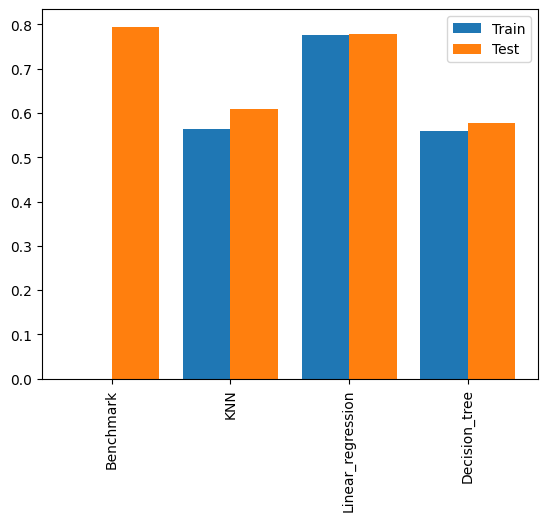

In [ ]:
model = ['Benchmark', 'KNN', 'Linear_regression', 'Decision_tree']
train_error = [0, 0.5626541503102247, 0.7758032449183537, 0.5587467638220581]
test_error = [0.794350851911791, 0.6081406834416057, 0.7782388849250498, 0.5776546677357921]
x_axis = np.arange (len (model))
plt.bar (x_axis - 0.2, train_error, width = 0.4, label = 'Train')
plt.bar (x_axis + 0.2, test_error, width = 0.4, label = 'Test')
plt.xticks (x_axis, model, rotation = 90)
plt.legend ()
plt.show ()